# Movimento de projéteis em 3D: o chute do Roberto Carlos na copa da França

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

## Introdução

Em um lançamento de projéteis em duas dimensões, o movimento pode ser descomposto no movimento nas duas direções, cujas equações do movimento são:

$$m \frac{d^2 x}{d t^2} = F_{R,x}$$

$$m \frac{d^2 y}{d t^2} = F_{R,y}$$

$$m \frac{d^2 z}{d t^2} = F_{R,z}$$

onde $F_{R,i}$ é a força resultante na direção $i = (x,y)$. Na ausência da resistência do ar tem-se $F_{R,x} = 0$ e $F_{R,y} = P$, onde $P$ é o peso do corpo. Se houver resistência do ar, a força resultante precisa incluir o efeito da resistência do ar $F_{R,i} \rightarrow F_{R,i} + F_{ar,i}$, onde $F_{ar}$ é a componente na direção $i$ da força da resistência do ar. Dos problemas anteriores, sabe-se que força de resistência do ar aponta na direção oposta da velocidade $\vec{v}$ do corpo, e é dada por: 

$$\vec{F}_{ar} = - B_2 v^2 \hat{v}$$

onde $B_2 = C \rho A/2$. Temos, portanto, um problema de duas equações diferenciais ordinárias de 2a. ordem. Uma forma conveniente de resolver o problema e transformar cada uma das EDOs de 2a. ordem em duas EDOs de primeira ordem. Desta forma, tem-se:


$$\frac{d x}{d t} = v_x$$

$$\frac{d v_x}{d t} = - \frac{B_2}{m} v v_x$$

$$\frac{d y}{d t} = v_y$$

$$\frac{d v_y}{d t} = - \frac{B_2}{m} v v_y$$

$$\frac{d z}{d t} = v_z$$

$$\frac{d v_z}{d t} = -g - \frac{B_2}{m} v v_z$$

$$v = \sqrt{v_x^2 + v_y^2 + v_z^2}$$


## Solução analítica sem resistência do ar

A soluação analítica para o problema acima sem a resistência do ar é:

$$x = x_0 + (v_0 \cos \theta \cos \alpha) t $$

$$v_x = v_0 \cos \theta \cos \alpha $$

$$y = x_0 + (v_0 \cos \theta \sin \alpha) t $$

$$v_y = v_0 \cos \theta \sin \alpha $$

$$z = z_0 + (v_0 \sin \theta) t - \frac{g t^2}{2} $$

$$v_z = v_0 \sin \theta - g t $$



## Solução numérica



A forma discretizada das esquações diferenciais sem e com o efeito da resistência do ar tornam-se:

$$x_{i+1} = x_i + v_{x,i} \Delta t$$

$$v_{x,i+1} = v_{x,i} \left(1 - \frac{B_2}{m} v_i \Delta t \right) $$

$$y_{i+1} = y_i + v_{y,i} \Delta t$$

$$v_{y,i+1} = v_{y,i} \left(1 - \frac{B_2}{m} v_i \Delta t \right)$$

$$z_{i+1} = z_i + v_{z,i} \Delta t$$

$$v_{z,i+1} = v_{z,i} \left(1 - \frac{B_2}{m} v_i \Delta t \right) - g \Delta t$$

$$v_i = \sqrt{v_{x,i}^2 + v_{y,i}^2 + v_{z,i}^2}$$

## Chute do Roberto Carlos na copa de 1998

[Chute do Roberto Carlos](https://www.youtube.com/watch?v=e0RAKn7LZVU)

## Medidas do campo de futebol

![Medidas do campo de futebol](campo_de_futebol_medidas.jpg)

## Código

O código abaixo resolve as equação diferencial do movimento de projéteis e compara com a solução analítica sem a resistência do ar.

In [1]:
# loading libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# assigning input variables

nt = 101          # number of time steps

omega0 = 5        # angular velocity of the spinning movement
mass = 1          # in kg (projectile mass)
g = 9.81          # in m/s^2 (gravity acceleration)

rho = 1.225       # in kg/m^3 (air density)
C = 0.1           # aerodynamic parameter
A = 0.1           # in m^2 (area cross-section)

B2 = C*rho*A/2    # auxiliary constant
cte = B2/mass     # auxiliary constant

S0 = 0.00041       

        

In [3]:
# defining a function that calculates the whole 
# time iteration of the diffencial equation 

def ProjectileMotion3D(t,x0,y0,z0,v0,theta,alpha,b2m,s0m=0,omega0=0):

    nsteps = len(t)  # find the number of time steps
    dt = t[1]-t[0]
    
    # array creation for all quantities
    x = np.zeros(nsteps)    # array of x coordinates    
    y = np.zeros(nsteps)    # array of y coordinates 
    z = np.zeros(nsteps)    # array of z coordinates     
    vx = np.zeros(nsteps)   # array of vx component with resist  
    vy = np.zeros(nsteps)   # array of vy component with resist
    vz = np.zeros(nsteps)   # array of vz component with resist
    v  = np.zeros(nsteps)   # array of sqrt(vx^2+vy^2+vz^2) component 

    # defining initial conditions
    x[0] = x0
    y[0] = y0
    z[0] = z0    
    v[0] = v0
    vx[0] = v0*np.cos(np.pi*theta/180)*np.cos(np.pi*alpha/180)  # cosine function only 
    vy[0] = v0*np.cos(np.pi*theta/180)*np.sin(np.pi*alpha/180)  # takes arguments in radian
    vz[0] = v0*np.sin(np.pi*theta/180)                          # takes arguments in radian

    # iterating loop starting at second array position 
    for i in range(1,nsteps):
        x[i] = x[i-1] + vx[i-1]*dt
        y[i] = y[i-1] + vy[i-1]*dt
        z[i] = z[i-1] + vz[i-1]*dt
        vx[i] = vx[i-1]*(1 - b2m*v[i-1]*dt) - s0m*omega0*vy[i-1]*dt
        vy[i] = vy[i-1]*(1 - b2m*v[i-1]*dt) + s0m*omega0*vx[i-1]*dt
        vz[i] = vz[i-1]*(1 - b2m*v[i-1]*dt) - g*dt        
        v[i] = np.sqrt(vx[i]**2 + vy[i]**2 + vz[i]**2)
    
    return x,y,z,vx,vy,vz,v


In [4]:
def Campo(ax,xlim,ylim,zlim):
    
    # desenha a TRAVE
    LT = 7.3
    HT = 2.4
    p1 = [0, +LT/2, 0]
    p2 = [0, +LT/2, HT]
    p3 = [0, -LT/2, HT]
    p4 = [0, -LT/2, 0]

    ax.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]],'k')
    ax.plot([p2[0],p3[0]],[p2[1],p3[1]],[p2[2],p3[2]],'k')
    ax.plot([p3[0],p4[0]],[p3[1],p4[1]],[p3[2],p4[2]],'k')

    # desenha a GRANDE AREA
    LY = 33 + LT
    LX = 16.5
    p1 = [0, LY/2, 0]
    p2 = [LX/2, LY/2, 0]
    p3 = [LX/2, -LY/2, 0]
    p4 = [0, -LY/2, 0]
    ax.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]],'k')
    ax.plot([p2[0],p3[0]],[p2[1],p3[1]],[p2[2],p3[2]],'k')
    ax.plot([p3[0],p4[0]],[p3[1],p4[1]],[p3[2],p4[2]],'k')

    # desenha a PEQUENA AREA
    LY = 11 + LT
    LX = 5.5
    p1 = [0, LY/2, 0]
    p2 = [LX/2, LY/2, 0]
    p3 = [LX/2, -LY/2, 0]
    p4 = [0, -LY/2, 0]
    ax.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]],'k')
    ax.plot([p2[0],p3[0]],[p2[1],p3[1]],[p2[2],p3[2]],'k')
    ax.plot([p3[0],p4[0]],[p3[1],p4[1]],[p3[2],p4[2]],'k')
    
    # desenha a LINHA DE FUNDO
    LY = 90
    LX = 120
    p1 = [0, LY/2, 0]
    p2 = [0, -LY/2, 0]
    p3 = [LX/2,-LY/2,0]
    p4 = [LX/2,+LY/2,0]
    ax.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]],'k')
    ax.plot([p2[0],p3[0]],[p2[1],p3[1]],[p2[2],p3[2]],'k')
    ax.plot([p3[0],p4[0]],[p3[1],p4[1]],[p3[2],p4[2]],'k')
        
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    #ax.set_aspect('auto')



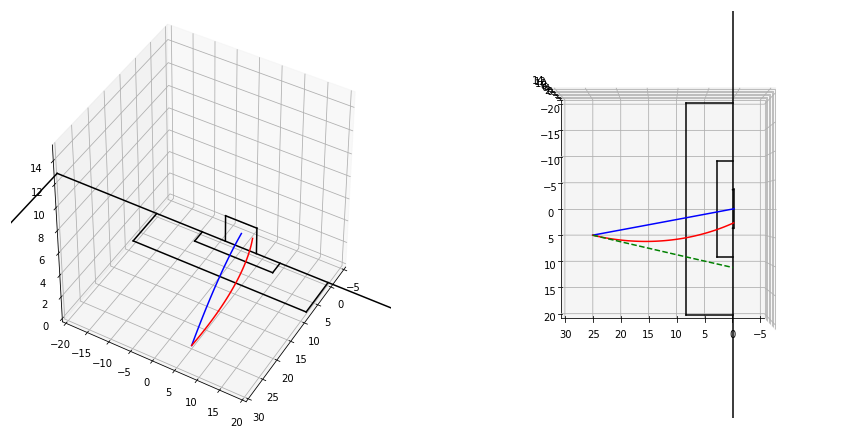

In [17]:
v0 = 150/3.6 # speed of RC quick
x0 = 25
y0 = 5
z0 = 0
dist = np.sqrt(x0**2+y0**2)
Tmax = 1.1*dist/v0
theta = 0.6*np.rad2deg(np.arctan(2/9.15))
alpha_direto = np.rad2deg(np.arcsin(y0/dist) + np.pi)
alpha_magnus = alpha_direto - 25

# array of time steps t_i (all filled with zeros)
time = np.linspace(0,Tmax,nt)

# calculating the solution WITH the air resistance
x1,y1,z1,vx1,vy1,vz1,v1 = ProjectileMotion3D(time,x0,y0,z0,v0,theta,alpha_direto,B2/mass)
x2,y2,z2,vx2,vy2,vz2,v2 = ProjectileMotion3D(time,x0,y0,z0,v0,theta,alpha_magnus,B2/mass,10*S0/mass,50*omega0)
x3,y3,z3,vx3,vy3,vz3,v3 = ProjectileMotion3D(time,x0,y0,z0,v0,theta,alpha_magnus,B2/mass)
#x4,y4,z4,vx4,vy4,vz4,v4 = ProjectileMotion3D(time,x0,y0,z0,v0,theta,alpha_direto,0)

#################################################

#fig = plt.figure()
#ax = plt.axes(projection='3d')

fig = plt.figure(figsize=(15, 7.5))

xlim = [-5,30]
ylim = [-20,20]
zlim = [0,15]

ax = fig.add_subplot(1, 2, 1, projection='3d')

# VISAO OBLIQUA
Campo(ax,xlim,ylim,zlim)
ax.plot(x1, y1, z1, 'b')
ax.plot(x2, y2, z2, 'r')
#ax.plot(x3, y3, z3, 'g')
#ax.plot(x4, y4, z4, 'k')
ax.view_init(elev=40., azim=30) 

# VISAO LATERAL
#ax = fig.add_subplot(1, 3, 2, projection='3d')
#Campo(ax,xlim,ylim,[0,5])
#ax.plot(x1, y1, z1, 'b')
#ax.plot(x2, y2, z2, 'r')
#ax.plot(x3, y3, z3, 'g--')
#ax.plot(x4, y4, z4, 'k')
#ax.view_init(elev=0., azim=90) 

# VISAO SUPERIOR
ax = fig.add_subplot(1, 2, 2, projection='3d')
Campo(ax,xlim,ylim,zlim)
ax.plot(x1, y1, z1, 'b')
ax.plot(x2, y2, z2, 'r')
ax.plot(x3, y3, z3, 'g--')
#ax.plot(x4, y4, z4, 'k')
ax.view_init(elev=90., azim=90) 

plt.show()



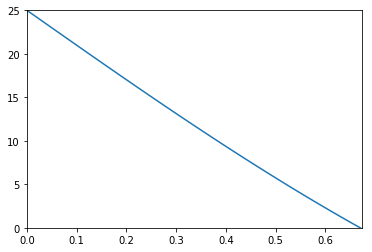

In [15]:
plt.plot(time,x2)
plt.axis([0,Tmax, 0, 25])
plt.show()

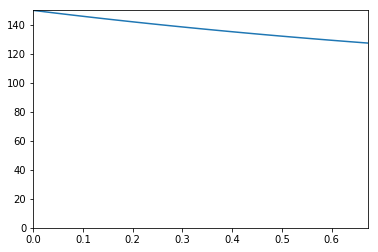

In [16]:
plt.plot(time,v2*3.6)
plt.axis([0,Tmax, 0, v0*3.6])
plt.show()